Подбор пароля с помощью генетического алгоритма.

# Уровень Light
Сделайте имитацию подбора пароля с помощью генетического алгоритма

Дополнительные пояснения к заданию:
1. В качестве функции ошибки можете использовать вот такой подход:

        def estimate_bot(bot):
            error = len(password) 
            # в цикле проходим по каждой букве
            # сравниваем с каждой буквой в реальном пароле
            # при каждом совпадении вычитаем единицу из ошибки
            for i in range(len(password)):
               if bot[i] == password[i]: # проверяем совпадают ли буквы
                    error -= 1 # вычитаем единицу. если совпадают
            return bot, error

    В реальных условиях такой подход естественно не сработает, поскольку мы не знаем реальный пароль. Но цель этого домашнего задания - тренировка работы с генетическими алгоритмами, а не создание взломщика паролей :)

2. Сама задача может оказаться довольно сложной (в зависимости от длины исходного пароля) и потребовать значительного времени вычисления, поэтому результат с ошибкой менее 4 символов будет считаться хорошим результатом

In [ ]:
import numpy as np  
import random
import matplotlib.pyplot as plt

Зададим пароль

In [ ]:
LenPsw=20
#набор символов
Symbols="""qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM[]{}:;<>?!@#$%^&()_-"""
SymbolList=[char for char in Symbols]

SourcePsw=[]#np.zeros((LenPsw))
for i in range(LenPsw):#len(SourcePsw)):
  SourcePsw.append(random.choice(SymbolList))#[i]=random.randint(SymbolMinVal,SymbolMaxVal)
print(SourcePsw)

['o', '&', 'A', 'w', 'k', 'f', 'K', 'r', 'K', 'Y', 'c', 'i', '!', 'c', 'G', 'a', 'z', 'a', '>', ':']


In [ ]:
 def estimate_password_quality(psw):
     
     error = LenPsw
     # в цикле проходим по каждой букве
     # сравниваем с каждой буквой в реальном пароле
     # при каждом совпадении вычитаем единицу из ошибки
     for i in range(LenPsw):
        if psw[i] == SourcePsw[i]: # проверяем совпадают ли буквы
             error -= 1 # вычитаем единицу. если совпадают
     return error

In [ ]:
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    '''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
    '''
    # Двумерный массив для новой популяции
    newpopul = [] 
    
    # Сортируем зачения в val в зависимости от параметра reverse    
    sval = sorted(val, reverse=reverse) 

    # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
    for i in range(nsurv): 
        
        # Получаем индекс i-того элемента sval в исходном массиве val
        index = val.index(sval[i])
        # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
        newpopul.append(popul[index])
    
    # Возвращаем новую популяцию (из nsurv элементов) и сортированный список    
    return newpopul, sval 

In [ ]:
def getParents(
        curr_popul,
        nsurv
        ):   

    '''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
    '''
    # Получаем дважды случайный индекс родителе в диапазоне от 0 до nsurv - 1
    indexp1 = random.randint(0, nsurv - 1)
    indexp2 = random.randint(0, nsurv - 1) 

    # Получаем первого бота-родителя по indexp1
    botp1 = curr_popul[indexp1] 

    # Получаем второго бота-родителя по indexp2 
    botp2 = curr_popul[indexp2]    
    
    # Возвращаем обоих полученных ботов
    return botp1, botp2 

In [ ]:
def crossPointFrom2Parents(
        botp1,
        botp2, 
        idx
        ):
    
    '''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - idx - номер компонента бота
    '''
    
    # Получаем случайное число в диапазоне от 0 до 1
    pindex = random.random() 
    
    # Если pindex меньше 0.5, то берем ген первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[idx]
    else:
        x = botp2[idx]
    
    # Возвращаем значние гена
    return x 

0   20.0   [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
1   19.89   [18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
2   19.574   [17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]
3   19.143   [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18]
4   18.715   [16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17]
5   18.51   [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17]
6   18.282   [14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
7   18.024   [14, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
8   17.97   [14, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
9   17.839   [14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
10   17.728   [14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16

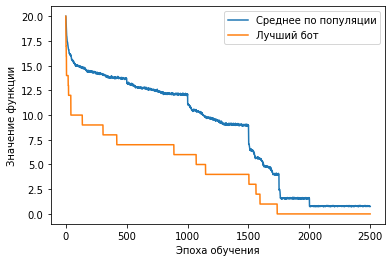

['o', '&', 'A', 'w', 'k', 'f', 'K', 'r', 'K', 'Y', 'c', 'i', '!', 'c', 'G', 'a', 'z', 'a', '>', ':']


In [ ]:
n = 1000        # Общее число ботов
nsurv = 200     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500   # количество эпох

mut = 0.5      # коэфициент мутаций
eph_change_mut = [500, 1000, 1500, 1750, 2000] # эпохи смены коэфициента мутации
new_mut = [0.45, 0.35, 0.2, 0.1, 0.05]         # новый коэфициент мутаци

#l = size.shape[0]       # Длина бота (количество единиц груза)
#trains = train.shape[0] # Количество вагонов поезда

popul = []     # Двумерный массив популяции, размерностью [n, l].
val = []       # Одномерный массив значений этих ботов

plotmeanval = [] # значения для графика по среднему значению
plotminval = []  # значения для графика по минимальному значению


# Проходим по всей длине популяции
for i in range(n): 

    # Создаем пустого бота
    popul.append([]) 
    
    # Проходим по всей длине бота 
    for j in range(LenPsw):     
        # В каждый ген бота пишем случайное значение
        gen = random.randint(SymbolMinVal,SymbolMaxVal)
        # в диапазоне от 0 до количества вагонов поезда
        popul[i].append(gen) 
# создали список списков всех зн
for it in range(epohs): 
    
    # проверяем текущую эпоху it на принадлежность графику смены мутации
    if it in eph_change_mut:
      
      # получаем индекс  по эпохе
      idx = eph_change_mut.index(it) 
      # проверяем текущую эпохуобновляем мутацию
      mut = new_mut[idx] 
      print('Смена мутации на', mut)
      print()  

    val = [] # Создаем пустой список для значений ботов
    
    # Проходим по всей популяции
    for i in range(n): 
        val.append(estimate_password_quality(popul[i]))    
    
    # Получаем новую популяцию и сортированный список значнией
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    
    # Выводим среднее значение и 20 лучших ботов
    print(it, " ", sum(val) / len(val), " ", sval[0:20])    
    
    # Добавляем среднее значение в список
    plotmeanval.append(sum(val) / len(val)) 
        
    # Добавляем минимальное значение в список
    plotminval.append(sval[0]) 

    # Проходимся в цикле nnew-раз
    for i in range(nnew): 
         # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        botp1, botp2 = getParents(newpopul, nsurv) 
                
        # Массив для нового бота
        newbot = [] 

        # Проходим по всей длине бота
        for j in range(LenPsw): 
            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j) 
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.choice(SymbolList)#random.randint(SymbolMinVal, SymbolMaxVal)        
   
            # Добавляем новое значение в бота
            newbot.append(x)       
        
        # Добавляем бота в новую популяцию
        newpopul.append(newbot)     
    
    # Записываем в popul новую посчитанную популяцию
    popul = newpopul 

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()
print(popul[0])

Получили пароль (номера символов)